In [19]:
import sympy as sp
from sympy.plotting import plot
sp.init_printing()

In [20]:
x= sp.Symbol('x')
f = -12*x**4*sp.sin(sp.cos(x)) - 18*x**3+5*x**2 + 10*x - 30
#пусть будет такой интервал:
domain = (-20,20)

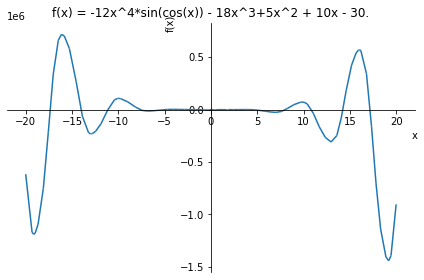

In [21]:
#Построить график
plot(f, (x, domain[0], domain[1]), title='f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30.')

In [22]:
#Определить корни
solutions = []
for i in range(domain[0],domain[1]): 
    try:
        solution = sp.nsolve(f,x,i)     
        if solution not in solutions:
            solutions.append(solution)      
    except:
        pass
solutions.sort()
#проверка выхода за границы интервала
if solutions[0] < domain[0]:
    solutions.pop(0)
if solutions[-1] > domain[1]:
    solutions.pop(-1)
print(f"Решение уравнения на интервале {domain}: {solutions}")

Решение уравнения на интервале (-20, 20): [-17.3665525069077, -14.0280559916623, -11.1337690610358, -7.65062228513275, -5.02686592820621, -1.33896663927711, 2.27305684575625, 4.38352369796896, 8.03516413341352, 10.8606499895942, 14.2405848102516, 17.1928480700451]


In [23]:
#Вычислить вершину
f1 = sp.diff(f,x)
print(f"Первая производная: {f1}")
solutions_f1 = []
for i in range(domain[0],domain[1]):
    try:
        solution = sp.nsolve(f1,x,i)
        if solution not in solutions_f1:
            solutions_f1.append(solution)      
    except:
        pass
solutions_f1.sort()
print(f"Вершины функции (экстремумы функции) на интервале {domain}: {solutions_f1}")
#Добавляем начало и конец интевала в список решений
solutions_f1.insert(0,domain[0])
solutions_f1.append(domain[1])

Первая производная: 12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10
Вершины функции (экстремумы функции) на интервале (-20, 20): [-19.1307079119221, -16.0805175716342, -12.9438052089824, -9.97895376101509, -6.83137004000085, -4.16778352385048, -0.392677179932750, 0.454573568108782, 1.70060727795121, 3.81931083338228, 7.00103165854095, 9.87714905397232, 13.0123448285001, 16.0314567099602, 19.1674784504931]


In [24]:
#Интервалы возрастания
func_increasing = []
for i in range(len(solutions_f1)-1):
    if (f1.subs(x,((solutions_f1[i+1] + solutions_f1[i])/2))) > 0:
        func_increasing.append((solutions_f1[i],solutions_f1[i+1]))

print(f"В диапазоне {domain} Интервалы возрастания функции: {func_increasing} ")

В диапазоне (-20, 20) Интервалы возрастания функции: [(-19.1307079119221, -16.0805175716342), (-12.9438052089824, -9.97895376101509), (-6.83137004000085, -4.16778352385048), (-0.392677179932750, 0.454573568108782), (1.70060727795121, 3.81931083338228), (7.00103165854095, 9.87714905397232), (13.0123448285001, 16.0314567099602), (19.1674784504931, 20)] 


In [25]:
#Интервалы убывания
func_decreasing = []
for i in range(len(solutions_f1)-1):
    if (f1.subs(x,((solutions_f1[i+1] + solutions_f1[i])/2))) < 0:
        func_decreasing.append((solutions_f1[i],solutions_f1[i+1]))

print(f"В диапазоне {domain} интервалы убывания функции: {func_decreasing} ")

В диапазоне (-20, 20) интервалы убывания функции: [(-20, -19.1307079119221), (-16.0805175716342, -12.9438052089824), (-9.97895376101509, -6.83137004000085), (-4.16778352385048, -0.392677179932750), (0.454573568108782, 1.70060727795121), (3.81931083338228, 7.00103165854095), (9.87714905397232, 13.0123448285001), (16.0314567099602, 19.1674784504931)] 


In [26]:
#Определить промежутки, на котором f > 0
iter_value = solutions
if iter_value[0] > domain[0]:
    iter_value.insert(0,domain[0])
if iter_value[-1] < domain[1]:
    iter_value.append(domain[1])
upper_interval = []

for i in range(len(iter_value)-1):
    if (f.subs(x,((iter_value[i+1] + iter_value[i])/2))) > 0:
        upper_interval.append((iter_value[i],iter_value[i+1]))

print(f"В диапазоне {domain} интервалы, в которых функция принимает положительные значения: {upper_interval} ")

В диапазоне (-20, 20) интервалы, в которых функция принимает положительные значения: [(-17.3665525069077, -14.0280559916623), (-11.1337690610358, -7.65062228513275), (-5.02686592820621, -1.33896663927711), (2.27305684575625, 4.38352369796896), (8.03516413341352, 10.8606499895942), (14.2405848102516, 17.1928480700451)] 


In [27]:
#Определить промежутки, на котором f < 0
lower_interval = []
for i in range(len(iter_value)-1):
    if (f.subs(x,((iter_value[i+1] + iter_value[i])/2))) < 0:
        lower_interval.append((iter_value[i],iter_value[i+1]))

print(f"В диапазоне {domain} интервалы, в которых функция принимает отрицательные значения: {lower_interval} ")

В диапазоне (-20, 20) интервалы, в которых функция принимает отрицательные значения: [(-20, -17.3665525069077), (-14.0280559916623, -11.1337690610358), (-7.65062228513275, -5.02686592820621), (-1.33896663927711, 2.27305684575625), (4.38352369796896, 8.03516413341352), (10.8606499895942, 14.2405848102516), (17.1928480700451, 20)] 
